# Project: Identify Customer Segments

In this project, you will apply unsupervised learning techniques to identify segments of the population that form the core customer base for a mail-order sales company in Germany. These segments can then be used to direct marketing campaigns towards audiences that will have the highest expected rate of returns. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

This notebook will help you complete this task by providing a framework within which you will perform your analysis steps. In each step of the project, you will see some text describing the subtask that you will perform, followed by one or more code cells for you to complete your work. **Feel free to add additional code and markdown cells as you go along so that you can explore everything in precise chunks.** The code cells provided in the base template will outline only the major tasks, and will usually not be enough to cover all of the minor tasks that comprise it.

It should be noted that while there will be precise guidelines on how you should handle certain tasks in the project, there will also be places where an exact specification is not provided. **There will be times in the project where you will need to make and justify your own decisions on how to treat the data.** These are places where there may not be only one way to handle the data. In real-life tasks, there may be many valid ways to approach an analysis task. One of the most important things you can do is clearly document your approach so that other scientists can understand the decisions you've made.

At the end of most sections, there will be a Markdown cell labeled **Discussion**. In these cells, you will report your findings for the completed section, as well as document the decisions that you made in your approach to each subtask. **Your project will be evaluated not just on the code used to complete the tasks outlined, but also your communication about your observations and conclusions at each stage.**

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Added this line for test

In [2]:
# force Pandas to show all rows of features dataframe
pd.options.display.max_rows = 1000

### Step 0: Load the Data

There are four files associated with this project (not including this one):

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. You will use this information to cluster the general population into groups with similar demographic properties. Then, you will see how the people in the customers dataset fit into those created clusters. The hope here is that certain clusters are over-represented in the customers data, as compared to the general population; those over-represented clusters will be assumed to be part of the core userbase. This information can then be used for further applications, such as targeting for a marketing campaign.

To start off with, load in the demographics data for the general population into a pandas DataFrame, and do the same for the feature attributes summary. Note for all of the `.csv` data files in this project: they're semicolon (`;`) delimited, so you'll need an additional argument in your [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call to read in the data properly. Also, considering the size of the main dataset, it may take some time for it to load completely.

Once the dataset is loaded, it's recommended that you take a little bit of time just browsing the general structure of the dataset and feature summary file. You'll be getting deep into the innards of the cleaning in the first major step of the project, so gaining some general familiarity can help you get your bearings.

In [3]:
azdias = pd.read_csv('Udacity_AZDIAS_Subset.csv', sep=';')

In [4]:
azdias.head(n=5)

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,-1,2,1,2.0,3,4,3,5,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,1,2,5.0,1,5,2,5,4,5,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,-1,3,2,3.0,1,4,1,2,3,5,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2,4,2,2.0,4,2,5,2,1,2,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,-1,3,1,5.0,4,3,4,1,3,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


Dataset has 85 columns 

In [5]:
azdias.columns

Index(['AGER_TYP', 'ALTERSKATEGORIE_GROB', 'ANREDE_KZ', 'CJT_GESAMTTYP',
       'FINANZ_MINIMALIST', 'FINANZ_SPARER', 'FINANZ_VORSORGER',
       'FINANZ_ANLEGER', 'FINANZ_UNAUFFAELLIGER', 'FINANZ_HAUSBAUER',
       'FINANZTYP', 'GEBURTSJAHR', 'GFK_URLAUBERTYP', 'GREEN_AVANTGARDE',
       'HEALTH_TYP', 'LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB',
       'LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB', 'LP_STATUS_FEIN',
       'LP_STATUS_GROB', 'NATIONALITAET_KZ', 'PRAEGENDE_JUGENDJAHRE',
       'RETOURTYP_BK_S', 'SEMIO_SOZ', 'SEMIO_FAM', 'SEMIO_REL', 'SEMIO_MAT',
       'SEMIO_VERT', 'SEMIO_LUST', 'SEMIO_ERL', 'SEMIO_KULT', 'SEMIO_RAT',
       'SEMIO_KRIT', 'SEMIO_DOM', 'SEMIO_KAEM', 'SEMIO_PFLICHT', 'SEMIO_TRADV',
       'SHOPPER_TYP', 'SOHO_KZ', 'TITEL_KZ', 'VERS_TYP', 'ZABEOTYP',
       'ALTER_HH', 'ANZ_PERSONEN', 'ANZ_TITEL', 'HH_EINKOMMEN_SCORE',
       'KK_KUNDENTYP', 'W_KEIT_KIND_HH', 'WOHNDAUER_2008',
       'ANZ_HAUSHALTE_AKTIV', 'ANZ_HH_TITEL', 'GEBAEUDETYP', 'KONSUMNAEHE',
       'MIN_

In [9]:
azdias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Data columns (total 85 columns):
AGER_TYP                 891221 non-null int64
ALTERSKATEGORIE_GROB     891221 non-null int64
ANREDE_KZ                891221 non-null int64
CJT_GESAMTTYP            886367 non-null float64
FINANZ_MINIMALIST        891221 non-null int64
FINANZ_SPARER            891221 non-null int64
FINANZ_VORSORGER         891221 non-null int64
FINANZ_ANLEGER           891221 non-null int64
FINANZ_UNAUFFAELLIGER    891221 non-null int64
FINANZ_HAUSBAUER         891221 non-null int64
FINANZTYP                891221 non-null int64
GEBURTSJAHR              891221 non-null int64
GFK_URLAUBERTYP          886367 non-null float64
GREEN_AVANTGARDE         891221 non-null int64
HEALTH_TYP               891221 non-null int64
LP_LEBENSPHASE_FEIN      886367 non-null float64
LP_LEBENSPHASE_GROB      886367 non-null float64
LP_FAMILIE_FEIN          886367 non-null float64
LP_FAMILIE_GROB          886367 n

Data frame has 891221 entries. Several of the columns have null values.

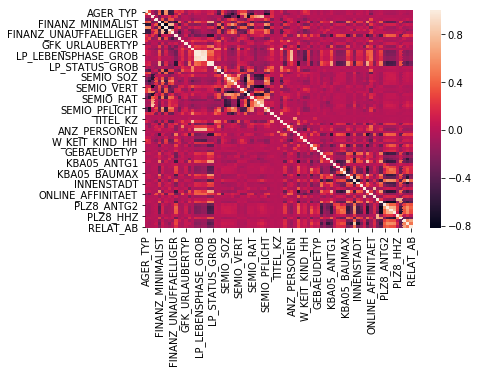

In [8]:
sns.heatmap(azdias.corr())

In [10]:
feat_info = pd.read_csv('AZDIAS_Feature_Summary.csv', sep=';')

In [11]:
feat_info

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]
5,FINANZ_SPARER,person,ordinal,[-1]
6,FINANZ_VORSORGER,person,ordinal,[-1]
7,FINANZ_ANLEGER,person,ordinal,[-1]
8,FINANZ_UNAUFFAELLIGER,person,ordinal,[-1]
9,FINANZ_HAUSBAUER,person,ordinal,[-1]


The lists in column 'missing_or_unknown' were encoded as strings. They must first be converted to a list.

In [13]:
feat_info['missing_codes'] = feat_info['missing_or_unknown'].apply(lambda x: x[1:-1].split(',')).values

In [39]:
num_missing=[]
for i in azdias.columns:
    b=0
    for x in feat_info[feat_info['attribute']==i]['missing_codes'].values[0]:
        b += (azdias[i].astype(str)==x).sum()
        azdias.loc[azdias[i].astype(str)==x,i] = np.nan
    num_missing.append(b)

In [40]:
i = azdias.columns[0]
#azdias.loc[azdias[i].astype(str)==x,i]
azdias[i]

0         NaN
1         NaN
2         NaN
3         2.0
4         NaN
5         3.0
6         NaN
7         NaN
8         NaN
9         NaN
10        0.0
11        NaN
12        NaN
13        NaN
14        NaN
15        1.0
16        NaN
17        NaN
18        NaN
19        NaN
20        NaN
21        NaN
22        NaN
23        NaN
24        NaN
25        NaN
26        NaN
27        NaN
28        NaN
29        2.0
30        NaN
31        NaN
32        NaN
33        NaN
34        3.0
35        NaN
36        NaN
37        2.0
38        NaN
39        NaN
40        NaN
41        NaN
42        NaN
43        NaN
44        NaN
45        1.0
46        NaN
47        2.0
48        NaN
49        NaN
50        NaN
51        NaN
52        NaN
53        NaN
54        NaN
55        NaN
56        NaN
57        NaN
58        NaN
59        NaN
60        3.0
61        NaN
62        NaN
63        NaN
64        NaN
65        NaN
66        NaN
67        1.0
68        1.0
69        NaN
70        NaN
71    

In [34]:
num_missing

[685843,
 2881,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 392318,
 0,
 0,
 111196,
 0,
 0,
 0,
 0,
 0,
 0,
 108315,
 108164,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 111196,
 0,
 0,
 111196,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 373,
 373,
 373,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [24]:
azdias[i].astype(str)=='-1'

0          True
1          True
2          True
3         False
4          True
5         False
6          True
7          True
8          True
9          True
10        False
11         True
12         True
13         True
14         True
15        False
16         True
17         True
18         True
19         True
20         True
21         True
22         True
23         True
24         True
25         True
26         True
27         True
28         True
29        False
30         True
31         True
32         True
33         True
34        False
35         True
36         True
37        False
38         True
39         True
40         True
41         True
42         True
43         True
44         True
45        False
46         True
47        False
48         True
49         True
50         True
51         True
52         True
53         True
54         True
55         True
56         True
57         True
58         True
59         True
60        False
61         True
62      

In [332]:
df['num_unknown']=num_unknown

In [333]:
display(df)

,attribute,information_level,type,missing_or_unknown,unknown_codes,missing_codes,num_unknown
0,AGER_TYP,person,categorical,"[-1,0]","[-1, 0]","[-1, 0]",677503
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]","[-1, 0, 9]","[-1, 0, 9]",0
2,ANREDE_KZ,person,categorical,"[-1,0]","[-1, 0]","[-1, 0]",0
3,CJT_GESAMTTYP,person,categorical,[0],[0],[0],0
4,FINANZ_MINIMALIST,person,ordinal,[-1],[-1],[-1],0
5,FINANZ_SPARER,person,ordinal,[-1],[-1],[-1],0
6,FINANZ_VORSORGER,person,ordinal,[-1],[-1],[-1],0
7,FINANZ_ANLEGER,person,ordinal,[-1],[-1],[-1],0
8,FINANZ_UNAUFFAELLIGER,person,ordinal,[-1],[-1],[-1],0
9,FINANZ_HAUSBAUER,person,ordinal,[-1],[-1],[-1],0


In [330]:
azdias.dtypes

AGER_TYP                   int64
ALTERSKATEGORIE_GROB       int64
ANREDE_KZ                  int64
CJT_GESAMTTYP            float64
FINANZ_MINIMALIST          int64
FINANZ_SPARER              int64
FINANZ_VORSORGER           int64
FINANZ_ANLEGER             int64
FINANZ_UNAUFFAELLIGER      int64
FINANZ_HAUSBAUER           int64
FINANZTYP                  int64
GEBURTSJAHR                int64
GFK_URLAUBERTYP          float64
GREEN_AVANTGARDE           int64
HEALTH_TYP                 int64
LP_LEBENSPHASE_FEIN      float64
LP_LEBENSPHASE_GROB      float64
LP_FAMILIE_FEIN          float64
LP_FAMILIE_GROB          float64
LP_STATUS_FEIN           float64
LP_STATUS_GROB           float64
NATIONALITAET_KZ           int64
PRAEGENDE_JUGENDJAHRE      int64
RETOURTYP_BK_S           float64
SEMIO_SOZ                  int64
SEMIO_FAM                  int64
SEMIO_REL                  int64
SEMIO_MAT                  int64
SEMIO_VERT                 int64
SEMIO_LUST                 int64
SEMIO_ERL 

In [335]:
azdias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Data columns (total 85 columns):
AGER_TYP                 213640 non-null float64
ALTERSKATEGORIE_GROB     213640 non-null float64
ANREDE_KZ                213640 non-null float64
CJT_GESAMTTYP            212009 non-null float64
FINANZ_MINIMALIST        213640 non-null float64
FINANZ_SPARER            213640 non-null float64
FINANZ_VORSORGER         213640 non-null float64
FINANZ_ANLEGER           213640 non-null float64
FINANZ_UNAUFFAELLIGER    213640 non-null float64
FINANZ_HAUSBAUER         213640 non-null float64
FINANZTYP                213640 non-null float64
GEBURTSJAHR              213640 non-null float64
GFK_URLAUBERTYP          212009 non-null float64
GREEN_AVANTGARDE         213640 non-null float64
HEALTH_TYP               213640 non-null float64
LP_LEBENSPHASE_FEIN      212009 non-null float64
LP_LEBENSPHASE_GROB      212009 non-null float64
LP_FAMILIE_FEIN          212009 non-null float64
LP_FAMI

In [336]:
# for example the GFK_URLAUBERTYP column has missing values and there is no code for unknown value. It is filled
# with NaN
azdias[azdias['GFK_URLAUBERTYP'].isnull()]['GFK_URLAUBERTYP']

0        NaN
1        NaN
2        NaN
4        NaN
6        NaN
7        NaN
8        NaN
9        NaN
11       NaN
12       NaN
13       NaN
14       NaN
16       NaN
17       NaN
18       NaN
19       NaN
20       NaN
21       NaN
22       NaN
23       NaN
24       NaN
25       NaN
26       NaN
27       NaN
28       NaN
30       NaN
31       NaN
32       NaN
33       NaN
35       NaN
36       NaN
38       NaN
39       NaN
40       NaN
41       NaN
42       NaN
43       NaN
44       NaN
46       NaN
48       NaN
49       NaN
50       NaN
51       NaN
52       NaN
53       NaN
54       NaN
55       NaN
56       NaN
57       NaN
58       NaN
59       NaN
61       NaN
62       NaN
63       NaN
64       NaN
65       NaN
66       NaN
69       NaN
70       NaN
71       NaN
72       NaN
73       NaN
74       NaN
75       NaN
76       NaN
77       NaN
78       NaN
79       NaN
80       NaN
81       NaN
82       NaN
83       NaN
85       NaN
87       NaN
88       NaN
89       NaN
90       NaN

In [59]:
feat_info['missing_or_unknown']

0       [-1,0]
1     [-1,0,9]
2       [-1,0]
3          [0]
4         [-1]
5         [-1]
6         [-1]
7         [-1]
8         [-1]
9         [-1]
10        [-1]
11         [0]
12          []
13          []
14      [-1,0]
15         [0]
16         [0]
17         [0]
18         [0]
19         [0]
20         [0]
21      [-1,0]
22      [-1,0]
23         [0]
24      [-1,9]
25      [-1,9]
26      [-1,9]
27      [-1,9]
28      [-1,9]
29      [-1,9]
        ...   
55        [-1]
56        [-1]
57      [-1,X]
58        [XX]
59     [-1,XX]
60        [-1]
61        [-1]
62        [-1]
63        [-1]
64      [-1,0]
65      [-1,0]
66        [-1]
67        [-1]
68        [-1]
69          []
70      [-1,0]
71          []
72          []
73      [-1,0]
74          []
75        [-1]
76        [-1]
77        [-1]
78        [-1]
79      [-1,0]
80        [-1]
81        [-1]
82      [-1,9]
83      [-1,0]
84      [-1,9]
Name: missing_or_unknown, Length: 85, dtype: object

## Step 1: Preprocessing

### Step 1.1: Assess Missing Data

The feature summary file contains a summary of properties for each demographics data column. You will use this file to help you make cleaning decisions during this stage of the project. First of all, you should assess the demographics data in terms of missing data. Pay attention to the following points as you perform your analysis, and take notes on what you observe. Make sure that you fill in the **Discussion** cell with your findings and decisions at the end of each step that has one!

#### Step 1.1.1: Convert Missing Value Codes to NaNs
The fourth column of the feature attributes summary (loaded in above as `feat_info`) documents the codes from the data dictionary that indicate missing or unknown data. While the file encodes this as a list (e.g. `[-1,0]`), this will get read in as a string object. You'll need to do a little bit of parsing to make use of it to identify and clean the data. Convert data that matches a 'missing' or 'unknown' value code into a numpy NaN value. You might want to see how much data takes on a 'missing' or 'unknown' code, and how much data is naturally missing, as a point of interest.

**As one more reminder, you are encouraged to add additional cells to break up your analysis into manageable chunks.**

Given the missing or unknown list in feat_info, we defined a function to process the missing values for all categories and replace them with Nan.